# Classification of Ocean Microbes

In [13]:
#install.packages("caret", dependencies = TRUE)
#install.packages("rpart", dependencies = TRUE)
#install.packages("tree", dependencies = TRUE)
#install.packages("randomForest", dependencies = TRUE)
#install.packages("e1071", dependencies = TRUE)
#install.packages("ggplot2", dependencies = TRUE)

library(ggplot2)
library(randomForest)
library(e1071)
#library(tree)
library(rpart)
library(caret)

In [2]:
datos <- read.csv("/home/user/datasci_course_materials/assignment5/seaflow_21min.csv")
#View(datos)
summary(datos)

    file_id           time          cell_id            d1       
 Min.   :203.0   Min.   : 12.0   Min.   :    0   Min.   : 1328  
 1st Qu.:204.0   1st Qu.:174.0   1st Qu.: 7486   1st Qu.: 7296  
 Median :206.0   Median :362.0   Median :14995   Median :17728  
 Mean   :206.2   Mean   :341.5   Mean   :15008   Mean   :17039  
 3rd Qu.:208.0   3rd Qu.:503.0   3rd Qu.:22401   3rd Qu.:24512  
 Max.   :209.0   Max.   :643.0   Max.   :32081   Max.   :54048  
       d2          fsc_small        fsc_perp        fsc_big     
 Min.   :   32   Min.   :10005   Min.   :    0   Min.   :32384  
 1st Qu.: 9584   1st Qu.:31341   1st Qu.:13496   1st Qu.:32400  
 Median :18512   Median :35483   Median :18069   Median :32400  
 Mean   :17437   Mean   :34919   Mean   :17646   Mean   :32405  
 3rd Qu.:24656   3rd Qu.:39184   3rd Qu.:22243   3rd Qu.:32416  
 Max.   :54688   Max.   :65424   Max.   :63456   Max.   :32464  
       pe          chl_small        chl_big           pop       
 Min.   :    0   Min.   :

In [3]:
smp_size<-floor(.5*nrow(datos))
set.seed(123)

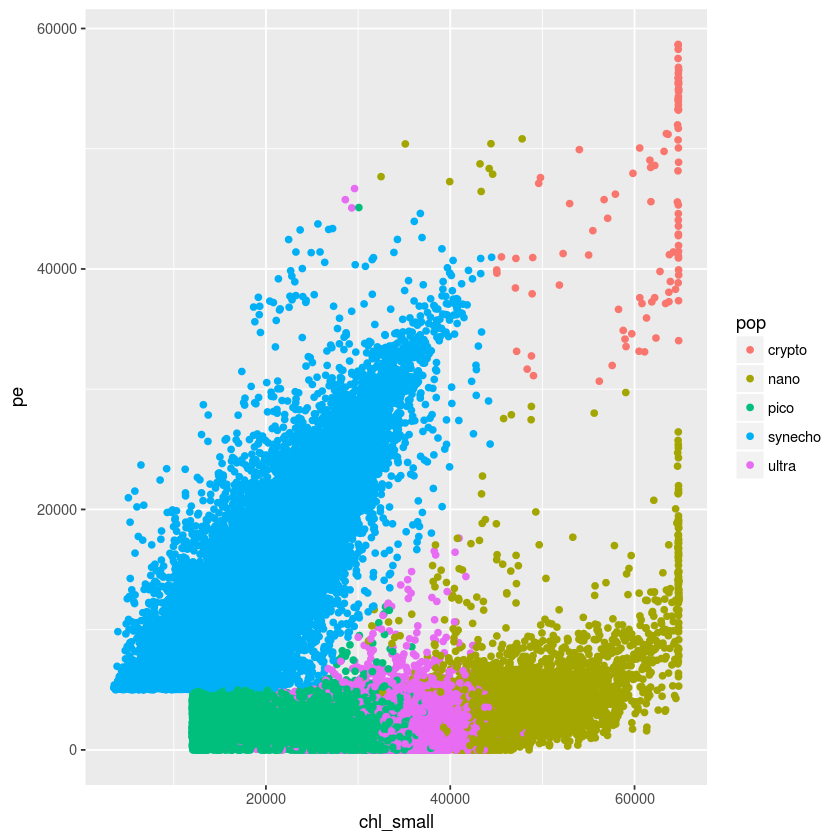

In [4]:
train_ind<-sample(seq_len(nrow(datos)),size=smp_size)
train<-datos[train_ind, ]
test<-datos[-train_ind, ]
ggplot(datos, aes(chl_small,pe)) + geom_point(aes(color=pop))

In [5]:
fol <- formula(pop ~ fsc_small + fsc_perp + fsc_big + pe + chl_big + chl_small)
model <- rpart(fol, method="class", data=train)
print(model)

n= 36171 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 36171 25730 pico (0.0013 0.18 0.29 0.25 0.28)  
   2) pe< 5004 26314 15923 pico (0 0.22 0.39 3.8e-05 0.38)  
     4) chl_small< 32652 11923  2256 pico (0 0.00042 0.81 8.4e-05 0.19) *
     5) chl_small>=32652 14391  6618 ultra (0 0.41 0.05 0 0.54)  
      10) chl_small>=41300 5242   653 nano (0 0.88 0.00019 0 0.12) *
      11) chl_small< 41300 9149  2028 ultra (0 0.14 0.079 0 0.78) *
   3) pe>=5004 9857   773 synecho (0.0048 0.055 0.0051 0.92 0.014)  
     6) chl_small>=38881.5 637   114 nano (0.074 0.82 0 0.049 0.057) *
     7) chl_small< 38881.5 9220   167 synecho (0 0.002 0.0054 0.98 0.011) *


In [6]:
prediction <- predict(model,test,type = "class")
result=test[,12]==as.character(prediction)
accuracy=sum(result)/nrow(test)
accuracy*100

[1] 85.3699

In [7]:
modelrf <- randomForest(fol,train)
prediction2 <- predict(modelrf,test,type = "class")
result2=test[,12]==as.character(prediction2)
accuracy2=sum(result2)/nrow(test)
importance(modelrf)

,MeanDecreaseGini
fsc_small,2675.4242
fsc_perp,2102.3678
fsc_big,207.5361
pe,8942.5263
chl_big,4835.9935
chl_small,8108.8478


In [8]:
modele1071 <- svm(fol, train)
prediction3 <- predict(modele1071,test,type="class")
result3 <- test[,12]==as.character(prediction3)
accuracy3=sum(result3)/nrow(test)

In [9]:
table(pred = prediction, true = test$pop)
table(pred = prediction2, true = test$pop)
table(pred = prediction3, true = test$pop)

         true
pred      crypto nano pico synecho ultra
  crypto       0    0    0       0     0
  nano        55 4934    0      29   702
  pico         0    4 9663       1  2302
  synecho      0   21   42    9031   123
  ultra        0 1299  714       0  7252

         true
pred      crypto  nano  pico synecho ultra
  crypto      54     0     0       1     0
  nano         0  5508     0       2   352
  pico         0     0 10074       0  1389
  synecho      1     3    10    9056    10
  ultra        0   747   335       2  8628

         true
pred      crypto  nano  pico synecho ultra
  crypto      50     1     0       0     0
  nano         0  5556     0       3   377
  pico         0     0 10045      21  1393
  synecho      5     3    84    9037     8
  ultra        0   698   290       0  8601

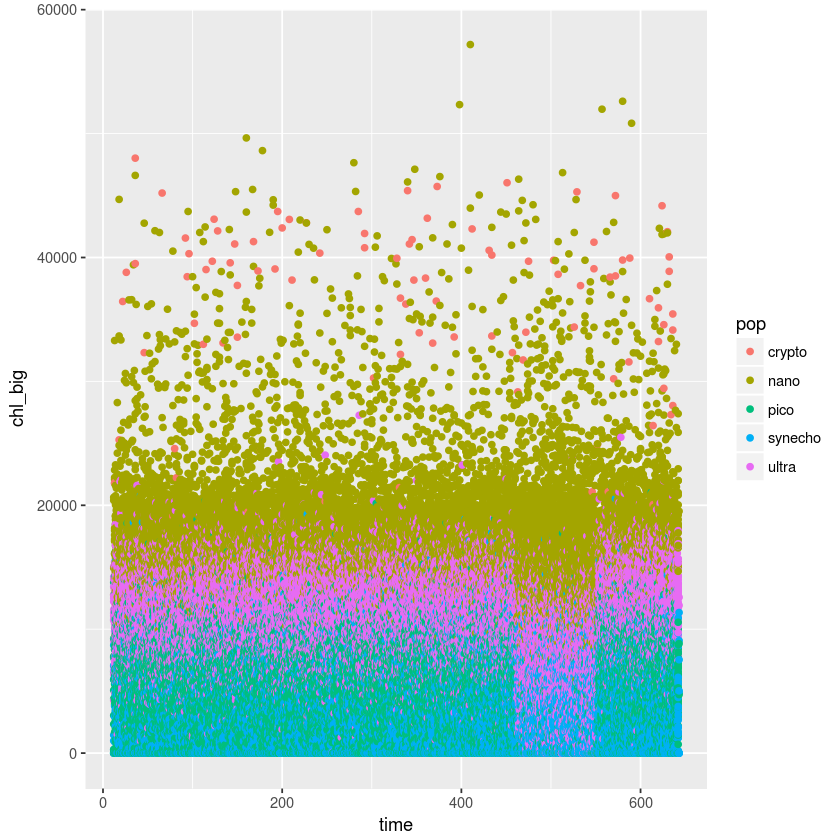

In [10]:
#fsc_small, fsc_perp, fsc_big, pe, chl_small, chl_big
#ggplot(datos, aes(fsc_big,chl_big)) + geom_point(aes(color=pop))
#The discontinuous fsc_big
#Remove file_id 208
ggplot(datos, aes(time,chl_big)) + geom_point(aes(color=pop))
datos_subset <- subset(datos, file_id != 208)

In [11]:
train_ind_subset<-sample(seq_len(nrow(datos_subset)),size=smp_size)
train_subset<-datos_subset[train_ind_subset, ]
test_subset<-datos_subset[-train_ind_subset, ]
modele1071_subset <- svm(fol, train_subset)
prediction3_subset <- predict(modele1071_subset,test_subset,type="class")
result3_subset <- test_subset[,12]==as.character(prediction3_subset)
accuracy3_subset=sum(result3_subset)/nrow(test_subset)

In [12]:
#Mejora de la precisión
(accuracy3_subset-accuracy3)*100

[1] 5.054259